# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [ ]:
# student 1: Idan 0145
# student 2:

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [6]:
# ייבוא מודולים נחוצים
import pandas as pd

# טעינת הנתונים
train_df = pd.read_csv('diabetes_test.csv')  # שים לב לשם הקובץ
test_df = pd.read_csv('diabetes_train.csv')    # שים לב לשם הקובץ

# הצגת 5 השורות הראשונות של כל דאטהסט
print("Train Dataset Preview:")
print(train_df.head())

print("\nTest Dataset Preview:")
print(test_df.head())


Train Dataset Preview:
    age  sex   bmi     bp     s1     s2    s3   s4      s5     s6  target
0  60.0  2.0  28.2  112.0  185.0  113.8  42.0  4.0  4.9836   93.0   178.0
1  55.0  2.0  22.9   81.0  123.0   67.2  41.0  3.0  4.3041   88.0   129.0
2  46.0  1.0  20.6   73.0  172.0  107.0  51.0  3.0  4.2485   80.0    53.0
3  58.0  1.0  22.8   91.0  196.0  118.8  48.0  4.0  4.9836  115.0   206.0
4  36.0  2.0  24.1  112.0  193.0  125.0  35.0  6.0  5.1059   95.0   163.0

Test Dataset Preview:
    age  sex   bmi      bp     s1     s2    s3    s4      s5     s6  target
0  52.0  1.0  23.0  107.00  179.0  123.7  42.5  4.21  4.1589   93.0    50.0
1  22.0  1.0  18.6   97.00  114.0   57.6  46.0  2.00  3.9512   83.0   101.0
2  34.0  2.0  25.3  111.00  230.0  162.0  39.0  6.00  4.9767   90.0   181.0
3  38.0  2.0  26.8  105.00  181.0  119.2  37.0  5.00  4.8203   91.0   107.0
4  55.0  1.0  23.0   94.67  190.0  137.6  38.0  5.00  4.2767  106.0   146.0


In [7]:
# סטטיסטיקות בסיסיות
print("Train Dataset Statistics:")
print(train_df.describe())

print("\nTest Dataset Statistics:")
print(test_df.describe())


Train Dataset Statistics:
             age        sex        bmi          bp          s1          s2  \
count  89.000000  89.000000  89.000000   89.000000   89.000000   89.000000   
mean   48.853933   1.494382  26.416854   94.835393  185.820225  113.752809   
std    12.117372   0.502801   4.022839   12.703367   34.048282   30.470060   
min    23.000000   1.000000  19.200000   70.000000   97.000000   47.200000   
25%    39.000000   1.000000  23.300000   86.000000  164.000000   97.200000   
50%    50.000000   1.000000  25.900000   93.000000  185.000000  112.200000   
75%    58.000000   2.000000  29.500000  105.000000  205.000000  128.000000   
max    72.000000   2.000000  34.600000  123.000000  281.000000  198.600000   

              s3         s4        s5          s6      target  
count  89.000000  89.000000  89.00000   89.000000   89.000000  
mean   48.044944   4.140112   4.65893   90.719101  151.696629  
std    11.792631   1.286242   0.51003   12.145883   73.091537  
min    28.00000

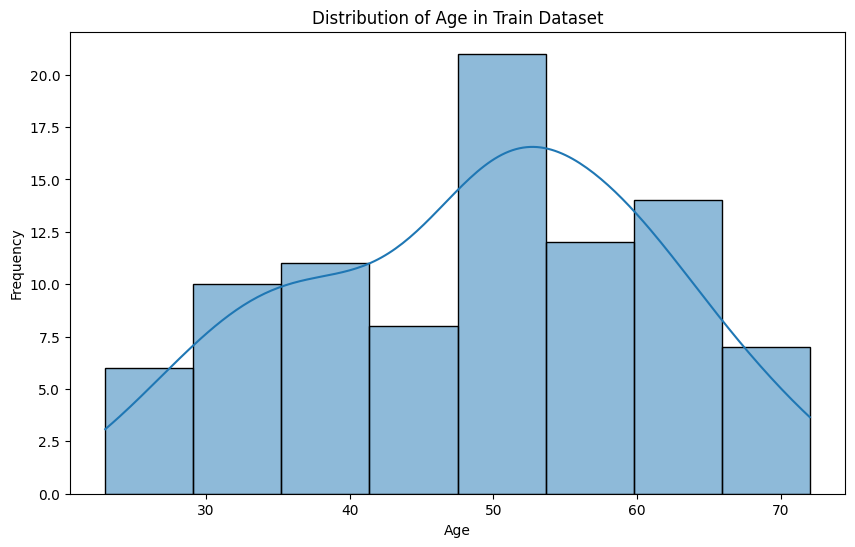

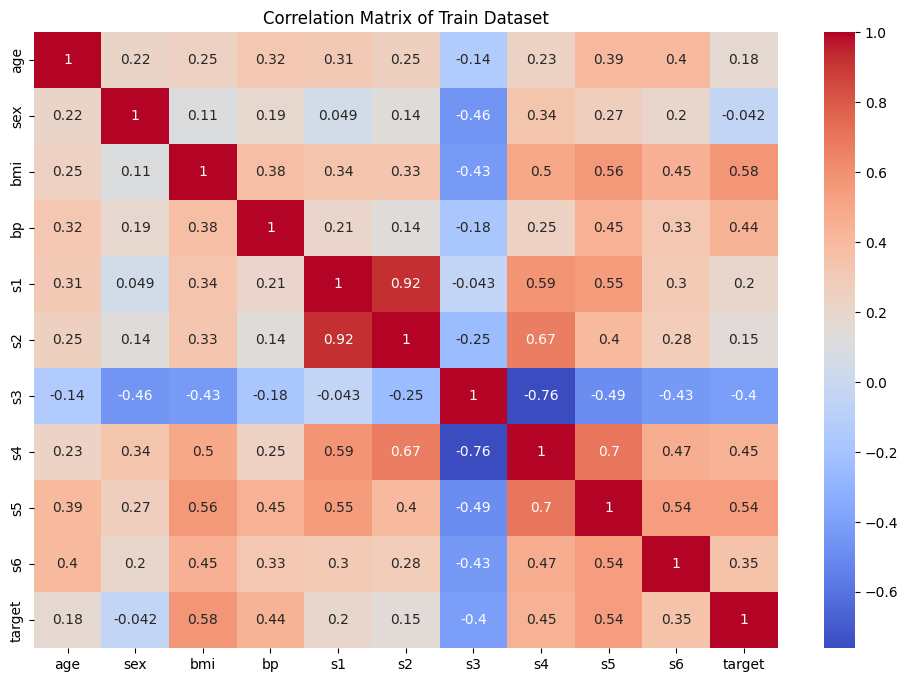

Missing Values in Train Dataset:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

Missing Values in Test Dataset:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


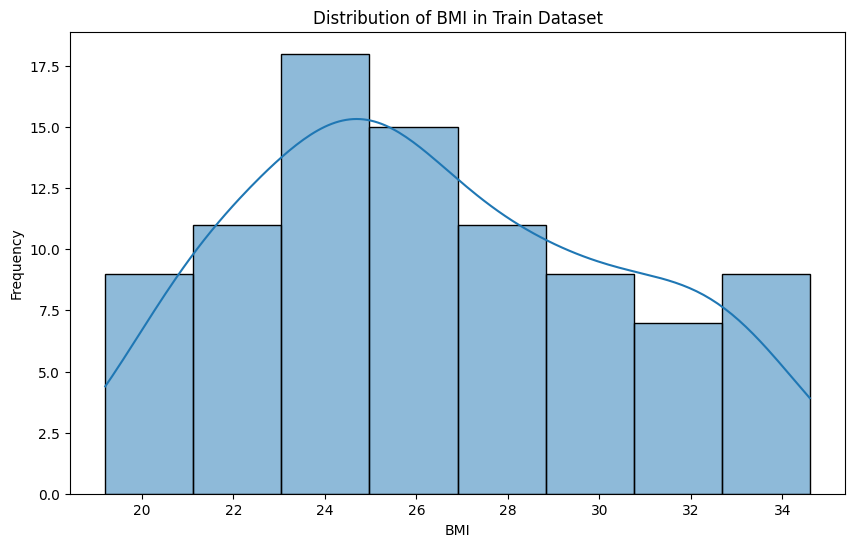

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# ויזואליזציה של התפלגות גיל (age)
plt.figure(figsize=(10, 6))
sns.histplot(train_df['age'], kde=True)
plt.title('Distribution of Age in Train Dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# מטריצת קורלציה
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Train Dataset')
plt.show()
# הצגת נתונים חסרים
print("Missing Values in Train Dataset:")
print(train_df.isnull().sum())

print("\nMissing Values in Test Dataset:")
print(test_df.isnull().sum())
# ויזואליזציה של התפלגות BMI (מדד מסת הגוף)
plt.figure(figsize=(10, 6))
sns.histplot(train_df['bmi'], kde=True)
plt.title('Distribution of BMI in Train Dataset')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


## Part 3 - Experiments
You could add as many code cells as needed

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Step 1: Load Data
# Assuming train_df and test_df are already loaded as part of your notebook environment
# Make sure the target column is named 'target' and the rest are feature columns

# Defining X and y
X_train = train_df.drop('target', axis=1)  # Features
y_train = train_df['target']               # Target

# Check class distribution if it's a classification problem
if y_train.nunique() > 1:  # Classification problem
    print("Class distribution in training data:")
    print(y_train.value_counts())

# Explanation:
# We separate the features (X_train) and the target variable (y_train) for training. 
# 'target' is the column that contains the value we want to predict.

# Step 2: Define Feature Engineering and Models
# Using StandardScaler for normalization
scaler = StandardScaler()

# Define models to experiment with
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'RandomForestClassifier': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression()
}

# Explanation:
# We define a dictionary `models` that contains the different models we want to try.
# Each entry has a model name as the key and the corresponding scikit-learn model object as the value.

# Step 3: Define Hyperparameters for Grid Search
param_grids = {
    'LinearRegression': {},  # No hyperparameters to tune for LinearRegression
    'Ridge': {'model__alpha': [0.1, 1.0, 10.0]},  # Tuning 'alpha' for Ridge regression
    'RandomForestClassifier': {
        'model__n_estimators': [50, 100],   # Number of trees in the forest
        'model__max_depth': [None, 10, 20]  # Maximum depth of the tree
    },
    'LogisticRegression': {'model__C': [0.01, 0.1, 1, 10]}  # Regularization strength for Logistic Regression
}

# Explanation:
# The `param_grids` dictionary specifies the hyperparameters to search for each model.
# When using a pipeline in GridSearchCV, parameters need to be prefixed with the step name followed by double underscores ('__').

# Step 4: Perform Grid Search Cross-Validation for Each Model
best_models = {}  # Dictionary to store the best models and their parameters

for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Create a pipeline that includes scaling and the model
    pipeline = Pipeline([
        ('scaler', scaler),  # Step 1: Feature Scaling
        ('model', model)     # Step 2: Model
    ])
    
    # Define the cross-validation strategy
    if 'Regress' in model_name:
        cv_strategy = KFold(n_splits=3)  # Use regular KFold for regression
        scoring = 'neg_mean_squared_error'
    else:
        cv_strategy = StratifiedKFold(n_splits=3)  # Use StratifiedKFold for classification
        scoring = 'f1_macro'
    
    # Setup GridSearchCV with the specified cross-validation strategy
    grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=cv_strategy, scoring=scoring)
    
    # Fit the grid search to find the best model and hyperparameters
    grid_search.fit(X_train, y_train)
    
    # Store the best model in the dictionary
    best_models[model_name] = grid_search.best_estimator_
    
    # Print the best parameters and the corresponding score
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {model_name}: {grid_search.best_score_}")

# Explanation:
# For each model, we create a `Pipeline` object that chains together data preprocessing (scaling) and the model itself.
# We use `GridSearchCV` to search for the best hyperparameters using 5-fold cross-validation and store the best model.

# Step 5: Summarize Results
# Create a DataFrame to summarize the results of the grid search
results_summary = pd.DataFrame({
    'Model': list(best_models.keys()),
    'Best Parameters': [grid_search.best_params_ for grid_search in best_models.values()],
    'Best Score': [grid_search.best_score_ for grid_search in best_models.values()]
})

print("\nSummary of Grid Search Results:")
print(results_summary)

# Explanation:
# The `results_summary` DataFrame provides a summary of the best models, their hyperparameters, and the corresponding scores.
# This helps to quickly identify which model and parameter combination performed the best.



Class distribution in training data:
target
53.0     3
178.0    2
163.0    2
141.0    2
111.0    2
        ..
201.0    1
75.0     1
74.0     1
245.0    1
83.0     1
Name: count, Length: 75, dtype: int64
Training LinearRegression...
Best parameters for LinearRegression: {}
Best cross-validation score for LinearRegression: -3132.1341525147604
Training Ridge...
Best parameters for Ridge: {'model__alpha': 0.1}
Best cross-validation score for Ridge: nan
Training RandomForestClassifier...


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^

Best parameters for RandomForestClassifier: {'model__max_depth': None, 'model__n_estimators': 50}
Best cross-validation score for RandomForestClassifier: 0.0
Training LogisticRegression...
Best parameters for LogisticRegression: {'model__C': 10}
Best cross-validation score for LogisticRegression: -6366.511111111111


AttributeError: 'Pipeline' object has no attribute 'best_params_'

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

## Part 5 - Apply on test and show model performance estimation